In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [60]:
dt_baseball = pd.read_csv('mlbbat10.csv')

In [61]:
dt_baseball

,name,team,position,game,at_bat,run,hit,double,triple,home_run,rbi,total_base,walk,strike_out,stolen_base,caught_stealing,obp,slg,bat_avg
0,I Suzuki,SEA,OF,162,680,74,214,30,3,6,43,268,45,86,42,9,0.359,0.394,0.315
1,D Jeter,NYY,SS,157,663,111,179,30,3,10,67,245,63,106,18,5,0.340,0.370,0.270
2,M Young,TEX,3B,157,656,99,186,36,3,21,91,291,50,115,4,2,0.330,0.444,0.284
3,J Pierre,CWS,OF,160,651,96,179,18,3,1,47,206,45,47,68,18,0.341,0.316,0.275
4,R Weeks,MIL,2B,160,651,112,175,32,4,29,83,302,76,184,11,4,0.366,0.464,0.269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,B Wood,KC,P,3,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000
1195,M Wuertz,OAK,P,4,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000
1196,M Zagurski,PHI,P,7,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000
1197,B Ziegler,OAK,P,6,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000


### General graph analysis

The objective of this section is to analyze the initial data, drawing conclusions based solely on its general characteristics. We will then examine the data distributions to investigate which variables stand out among the players.

Regarding the players and the number of games each one played, the histogram below shows that most of the players present in the dataset played less than 20 games, so it is important to normalize the data in relation to the number of games to avoid producing erroneous conclusions.

It will also be important to consider these players with few games later, so that their statistics do not influence the more general conclusions that will be made regarding the data.

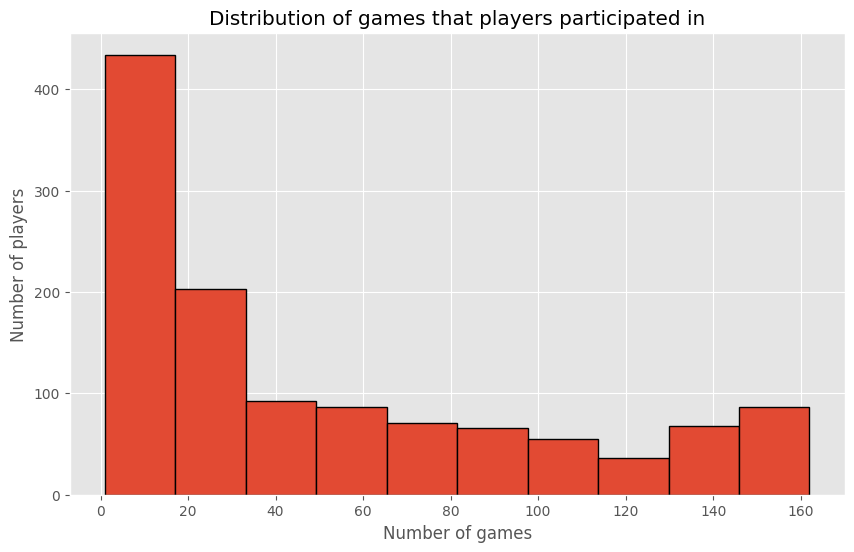

In [85]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.hist(dt_baseball["game"], edgecolor="black", linewidth=1.0);
ax.set_xlabel("Number of games")
ax.set_ylabel("Number of players")
ax.set_title("Distribution of games that players participated in");


Next, the distribution of home runs was analyzed. The first graph below shows that few players stood out with high home run numbers. Furthermore, after analyzing the proportion of game participation and home runs, the same conclusion is reached.

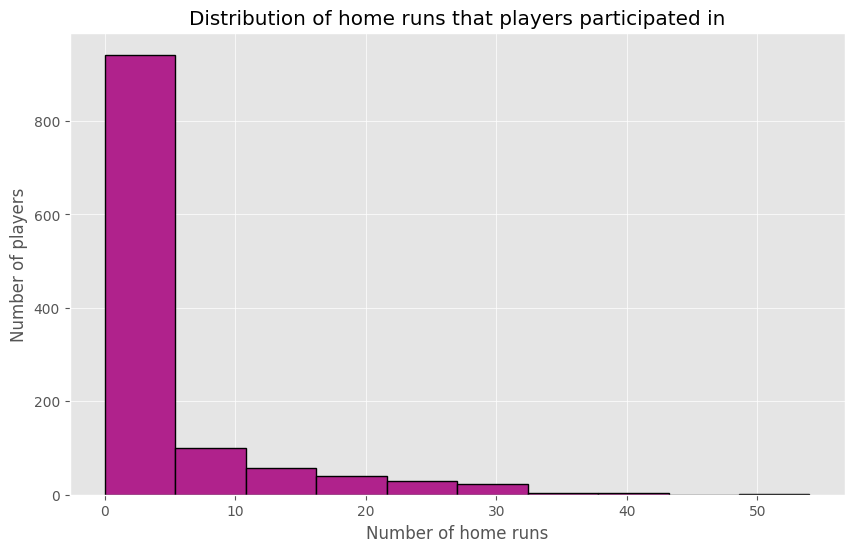

In [93]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(10, 6))


ax.hist(dt_baseball["home_run"], edgecolor="black", linewidth=1.0, color="#B0228C");
ax.set_xlabel("Number of home runs")
ax.set_ylabel("Number of players")
ax.set_title("Distribution of home runs that players participated in");


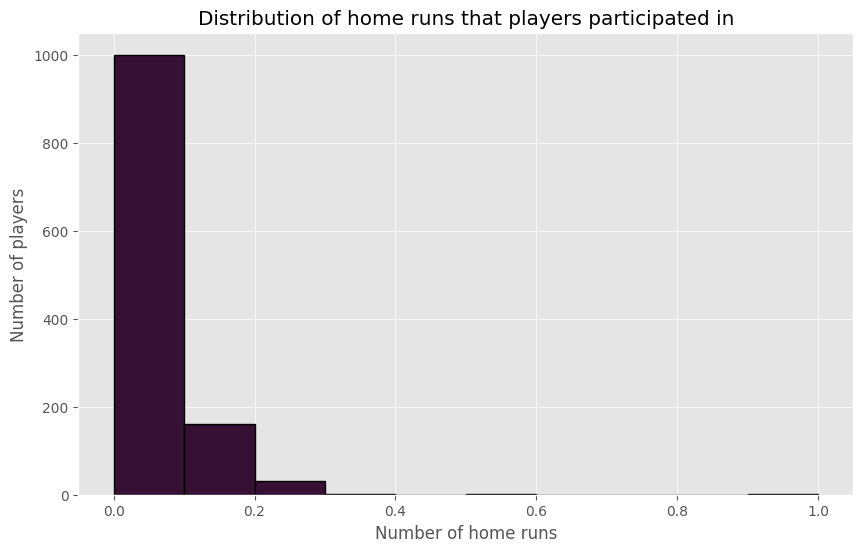

In [ ]:
plt.style.use('ggplot')
dt_baseball["home_per_game"] = dt_baseball["home_run"] / dt_baseball["game"]
fig, ax = plt.subplots(figsize=(10, 6))


ax.hist(dt_baseball["home_per_game"], edgecolor="black", linewidth=1.0, color="#361134");
ax.set_xlabel("Number of home runs")
ax.set_ylabel("Number of players")
ax.set_title("Distribution of home runs/games that players participated in");

The boxplots below compare the distribution of the variables **strike_out**, **total_base**, **home_run**, **rbi**, **run**, and **hit**. In all the boxplots, we can see that the medians have low values, meaning that most of the players' statistics regarding these variables are low. Therefore, few players stand out, and the distributions are asymmetric.

Regarding the **strike_out** column, the median is one of the largest among all the boxplots, which means that players generally make a lot of mistakes. The large number of outliers also suggests that several players have strikeouts. Regarding variance, the box is not very wide, so we can't assume much information.

The **rbi** and **run** columns have similar boxplots. In both, the large number of outliers indicates that some players excelled more than others, whether in driving runs or scoring a lot. The boxplots show a consistent distribution among the values, although because the median is closer to the first quartile, this indicates that most players are statistically underperforming.

The long distribution of **total_base** indicates that there is a significant difference between the most stable players and those who have little progress. Furthermore, the low median and the presence of many outliers confirms that in general the offensive power of the group of players is low, dependent on the star players.

The data related to **hit** are consistent, however, with the median very close to the first quartile and with outliers standing out again, it is confirmed that most players do not usually hit the ball very successfully, and the best players have a significant role in statistics such as hitting average.

The distribution shown in **home_run** with a small, skewed box is common, as most players are expected to hit few home runs. However, the outliers confirm that some players stood out during the season.

Finally, considering that most boxplots present boxes with medians close to Q1 and a large number of outliers, it can be concluded that the distribution of the data is asymmetric and that it depends on the best players, while there is a relatively high number of players with more modest statistics.

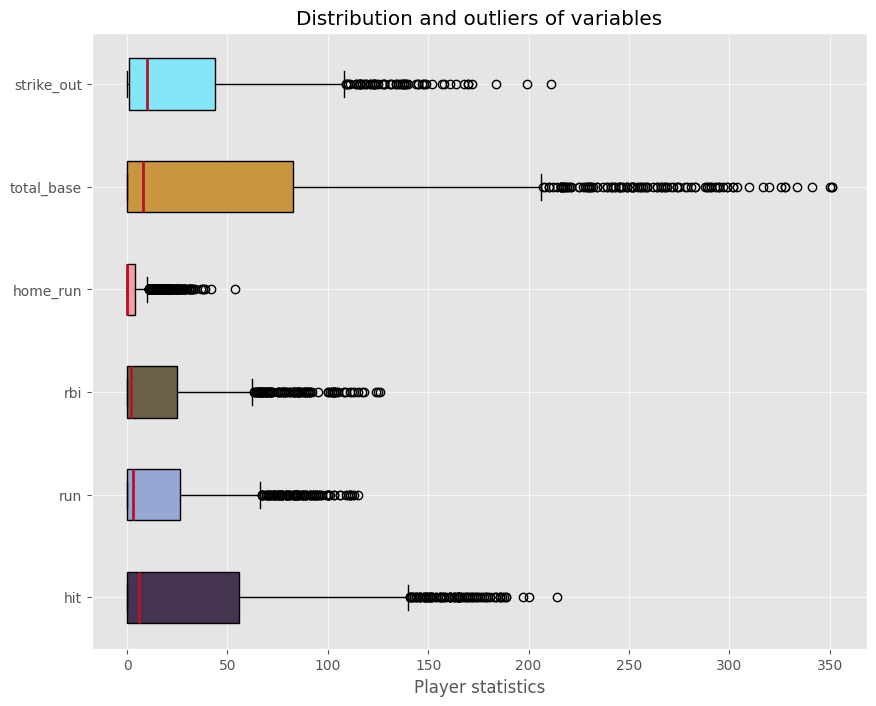

In [129]:
fig, ax = plt.subplots(figsize=(10, 8))
medianprops = dict(linewidth=2, color="#B3142C")
graph2 = ax.boxplot(dt_baseball[['hit', 'run', 'rbi', 'home_run', 
                                 'total_base', 'strike_out']], 
                    patch_artist=True, 
                    tick_labels=["hit", "run", "rbi", "home_run",
                                 "total_base", "strike_out"],
                    medianprops=medianprops,
                    vert=False);
ax.set_xlabel("Player statistics")

colors = ["#44344F", "#98A6D4", "#696047", "#F59CA9", "#C8963E", "#84E6F8"]
for patch, color in zip(graph2["boxes"], colors):
    patch.set_facecolor(color)

ax.set_title("Distribution and outliers of variables");

Comparing the winner of the ***American League Championship Series*** to the ***National League Championship Series***

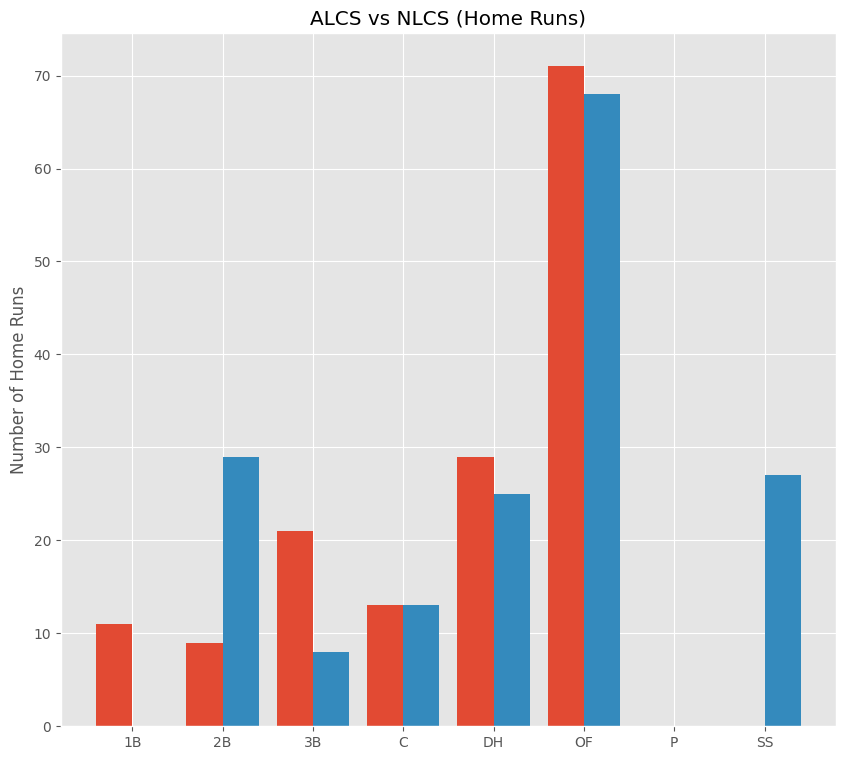

In [64]:
#calculating the values ​​of each champion by position
alcs_champions = dt_baseball.loc[dt_baseball["team"]=="TEX"].groupby(["position"]).sum()
nlcs_champions = dt_baseball.loc[dt_baseball["team"]=="SF"].groupby(["position"]).sum()

#determining the values ​​of home runs by position and the index of the positions that exist
alcs_homerun = alcs_champions["home_run"].values
index_champions = alcs_champions.index
nlcs_homerun = nlcs_champions["home_run"].values

home_run_champions = pd.DataFrame({'alcs': alcs_homerun,
                   'nlcs': nlcs_homerun}, index=index_champions )

plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(10, 9))

x = np.arange(len(index_champions))

ax.bar(x - 0.40/2, alcs_homerun, width=0.40)
ax.bar(x + 0.40/2, nlcs_homerun, width=0.40)

ax.set_ylabel("Number of Home Runs")
ax.set_title("ALCS vs NLCS (Home Runs)")
ax.set_xticks(x)
ax.set_xticklabels(index_champions)
plt.show()


### New York Yankees Analysis

The first thing to do is view the statistics of each player on the yankees team.

<Axes: xlabel='name'>

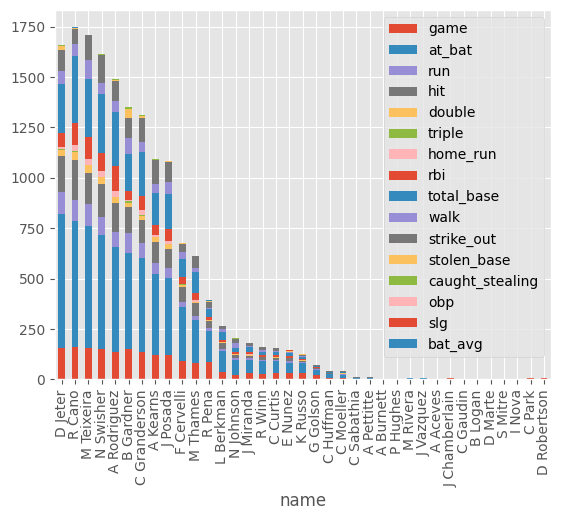

In [63]:
yankees = dt_baseball.loc[dt_baseball["team"]=="NYY"]
yankees.plot(kind="bar", x="name", stacked=True)

I want to analyze the yankees players, how many home runs have the players on this team hit? Who did the most? Who did the least?

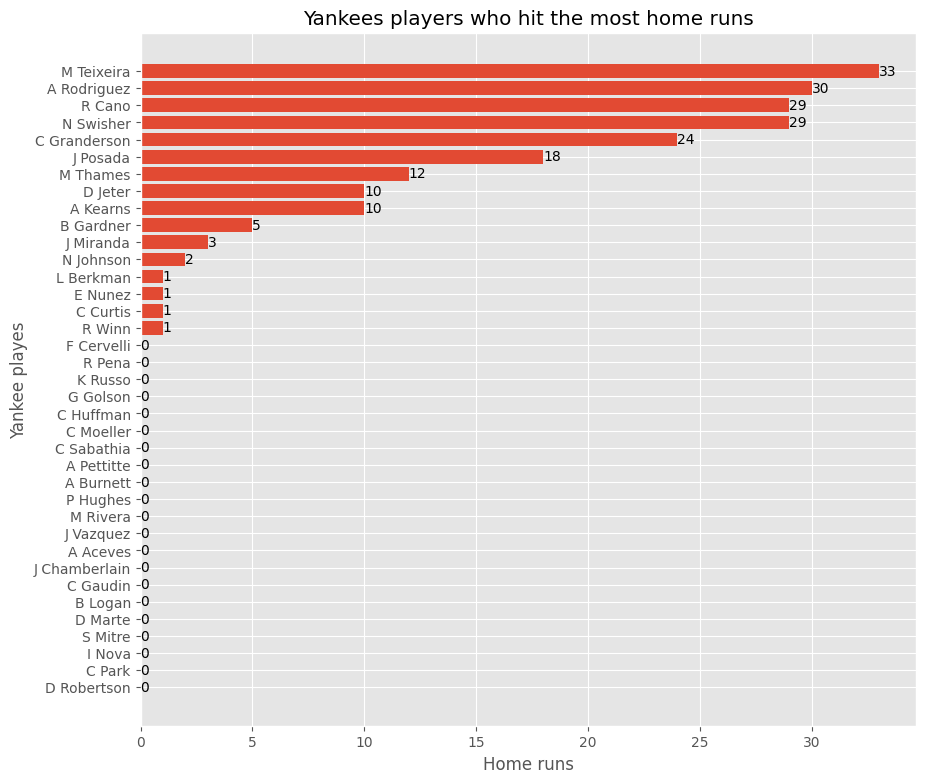

In [65]:
players_yankees = dt_baseball.loc[dt_baseball["team"]=="NYY"].set_index('name').sort_values(by="home_run", ascending=False)

plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(10, 9))

graph_yankees = ax.barh(players_yankees.index, players_yankees["home_run"])
ax.set_xlabel("Home runs")
ax.set_ylabel("Yankee playes")
ax.invert_yaxis()
ax.bar_label(graph_yankees, label_type="edge");
ax.set_title("Yankees players who hit the most home runs");



### All teams

Looking at all the team statistics.

<Axes: title={'center': 'at bat for each team'}, xlabel='team'>

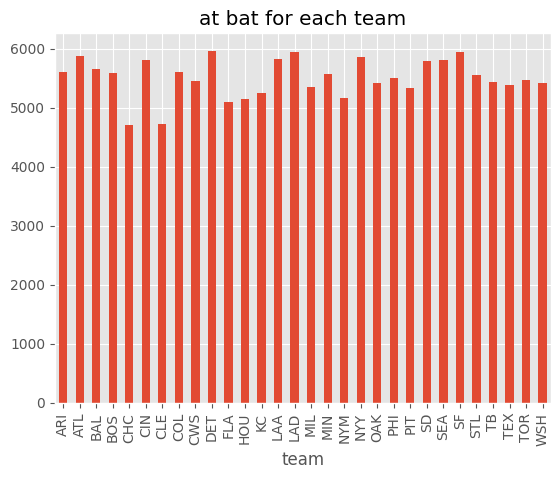

In [66]:
team = dt_baseball.groupby("team")["at_bat"].sum()
team.plot(kind="bar", title="at bat for each team")


<Axes: title={'center': 'runs for each team'}, xlabel='team'>

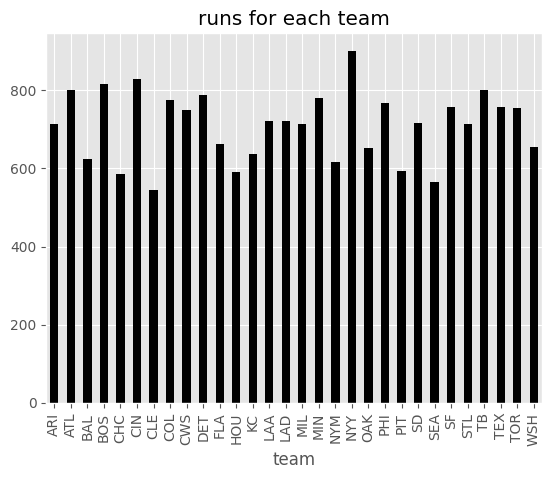

In [67]:
team = dt_baseball.groupby("team")["run"].sum()
team.plot(kind="bar", title="runs for each team", color="black")

<Axes: title={'center': 'hits for each team'}, xlabel='team'>

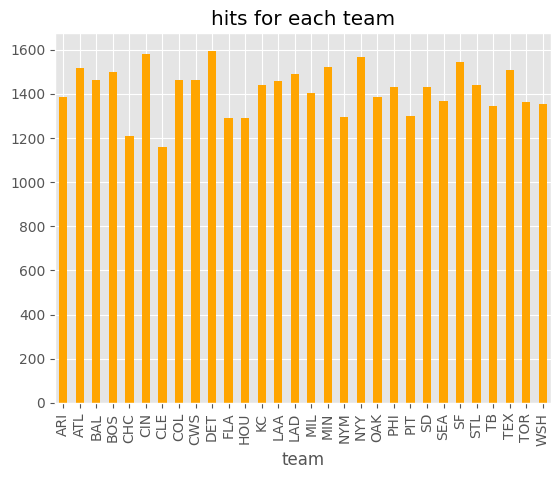

In [68]:
team = dt_baseball.groupby("team")["hit"].sum()
team.plot(kind="bar", title="hits for each team", color="orange")

<Axes: title={'center': 'doubles for each team'}, xlabel='team'>

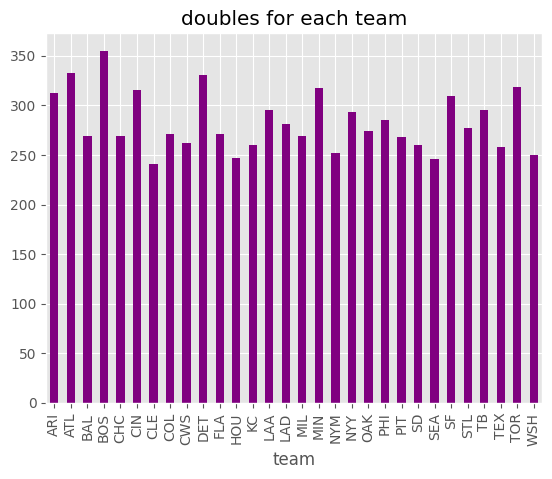

In [69]:
team = dt_baseball.groupby("team")["double"].sum()
team.plot(kind="bar", title="doubles for each team", color="purple")

<Axes: title={'center': 'triples for each team'}, xlabel='team'>

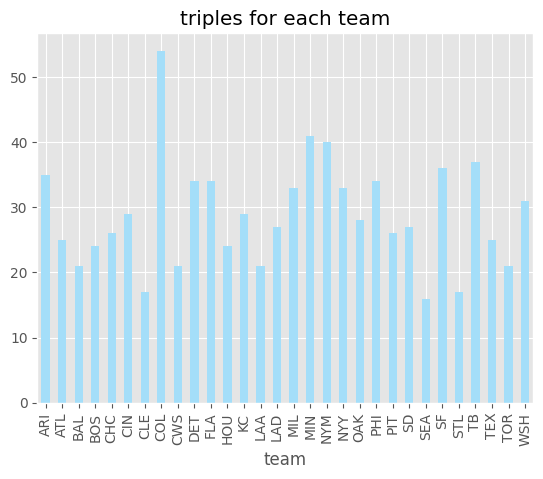

In [70]:
team = dt_baseball.groupby("team")["triple"].sum()
team.plot(kind="bar", title="triples for each team", color="#a4def9")

<Axes: title={'center': 'homeruns for each team'}, xlabel='team'>

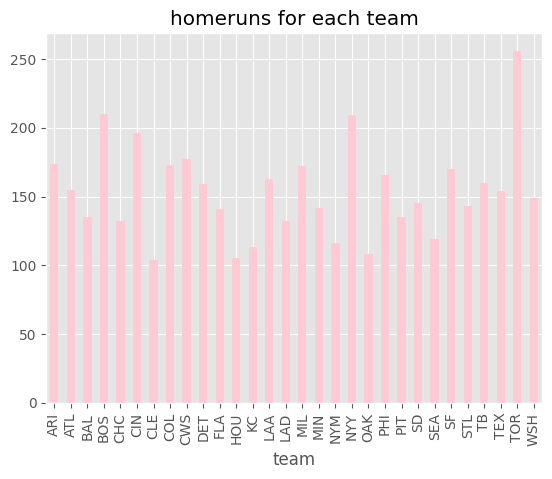

In [71]:
team = dt_baseball.groupby("team")["home_run"].sum()
team.plot(kind="bar", title="homeruns for each team", color="#FFCAD4")

<Axes: title={'center': 'runs batted in for each team'}, xlabel='team'>

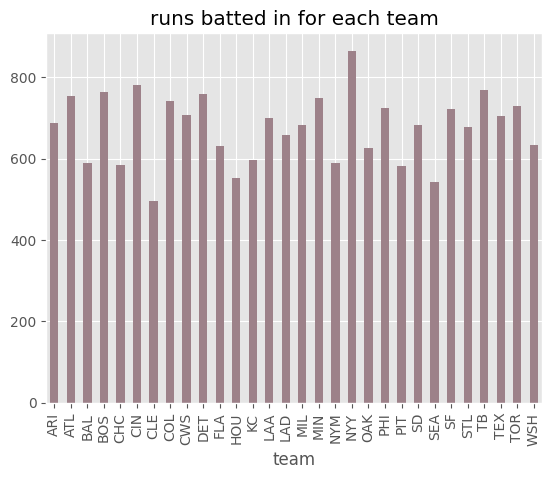

In [72]:
team = dt_baseball.groupby("team")["rbi"].sum()
team.plot(kind="bar", title="runs batted in for each team", color="#9D8189")

<Axes: title={'center': 'total bases for each team'}, xlabel='team'>

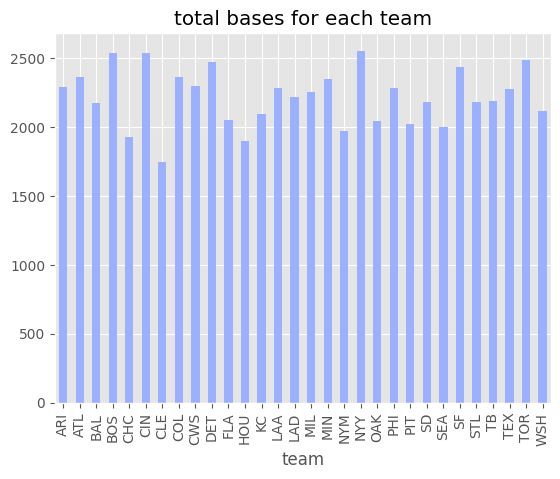

In [73]:
team = dt_baseball.groupby("team")["total_base"].sum()
team.plot(kind="bar", title="total bases for each team", color="#9BB1FF")

<Axes: title={'center': 'walks for each team'}, xlabel='team'>

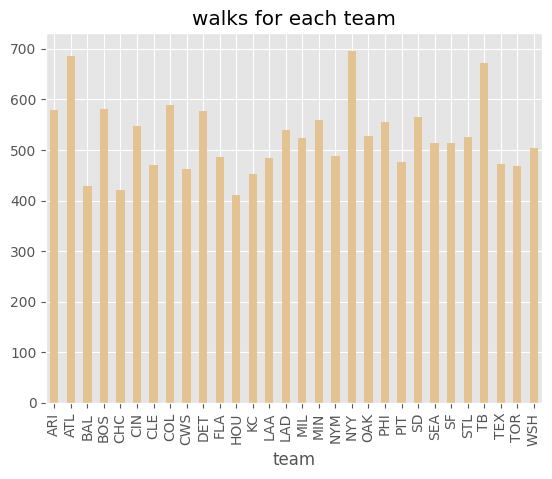

In [74]:
team = dt_baseball.groupby("team")["walk"].sum()
team.plot(kind="bar", title="walks for each team", color="#E2C391")

<Axes: title={'center': 'strike outs for each team'}, xlabel='team'>

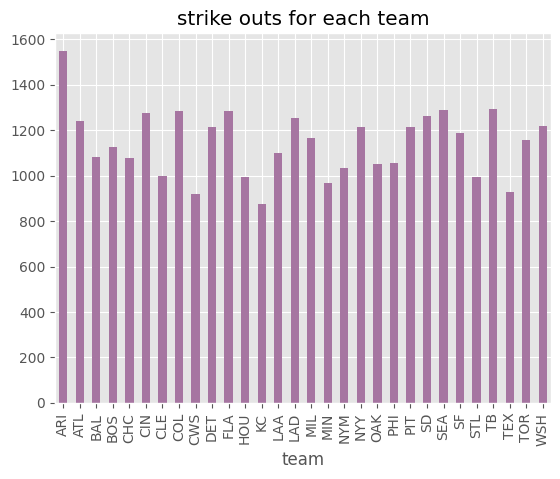

In [75]:
team = dt_baseball.groupby("team")["strike_out"].sum()
team.plot(kind="bar", title="strike outs for each team", color="#A675A1")

<Axes: title={'center': 'stolen bases for each team'}, xlabel='team'>

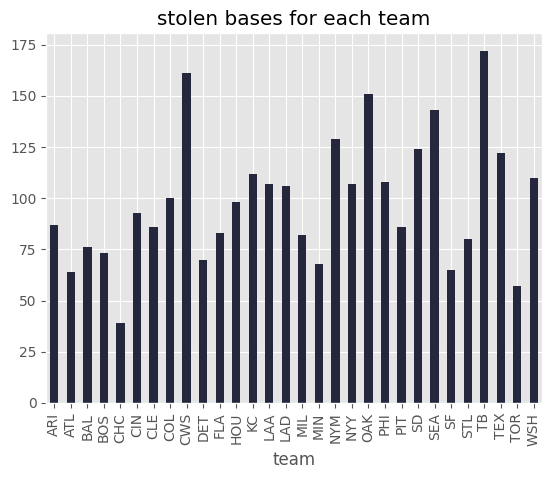

In [76]:
team = dt_baseball.groupby("team")["stolen_base"].sum()
team.plot(kind="bar", title="stolen bases for each team", color="#25283D")

<Axes: title={'center': 'caught stealing for each team'}, xlabel='team'>

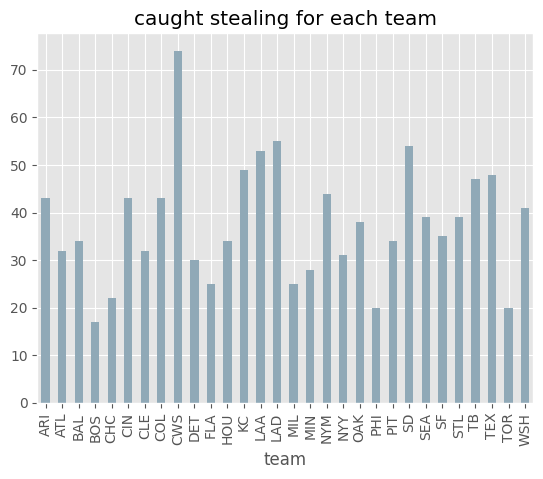

In [77]:
team = dt_baseball.groupby("team")["caught_stealing"].sum()
team.plot(kind="bar", title="caught stealing for each team", color="#90A9B7")

<Axes: title={'center': 'sum of on base percentage for each team'}, xlabel='team'>

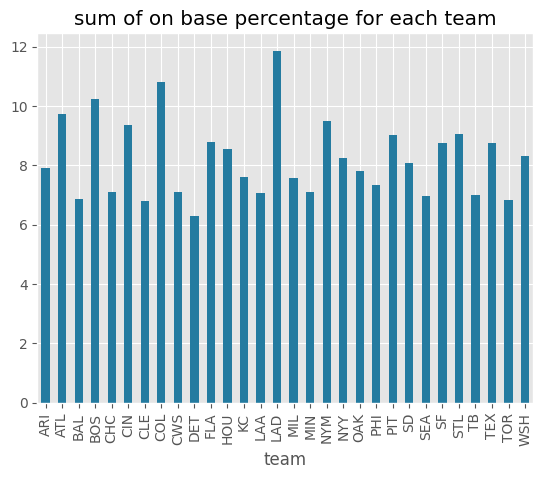

In [78]:
team = dt_baseball.groupby("team")["obp"].sum()
team.plot(kind="bar", title="sum of on base percentage for each team", color="#247BA0")

<Axes: title={'center': 'slugging percentage for each team'}, xlabel='team'>

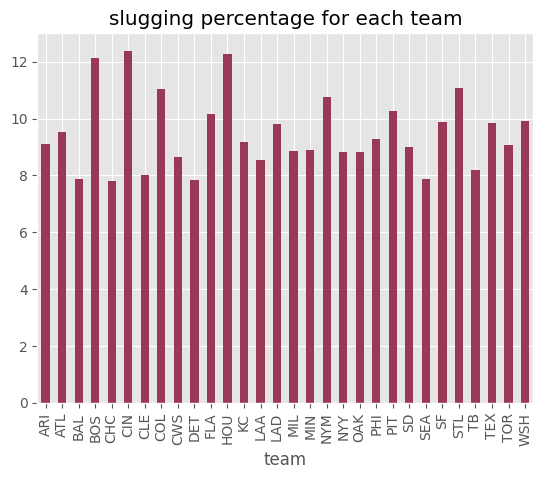

In [79]:
team = dt_baseball.groupby("team")["slg"].sum()
team.plot(kind="bar", title="slugging percentage for each team", color="#993955")

<Axes: title={'center': 'bat average for each team'}, xlabel='team'>

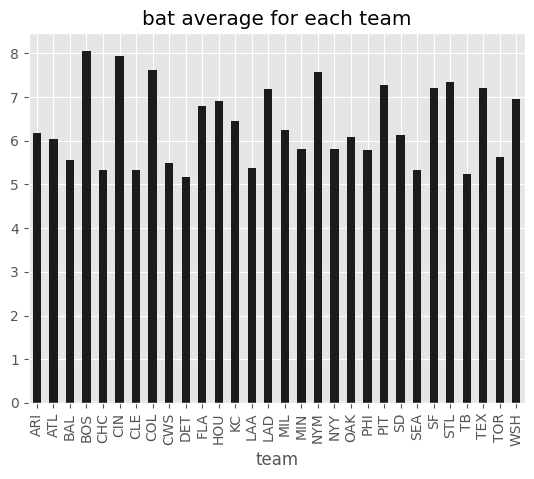

In [80]:
team = dt_baseball.groupby("team")["bat_avg"].sum()
team.plot(kind="bar", title="bat average for each team", color="#1B1B1E")